# Importing Libraries

In [1]:
import torch
from torch import nn
#import torch.nn.functional as F
from torchvision import datasets, models, transforms

#import numpy as np

#import requests

import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

#from PIL import Image, ImageOps

from git.repo.base import Repo
import reprlib
import sys

# Configuring Visualization Parameters

In [2]:
%matplotlib inline

In [3]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [4]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": .8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# Configuring Pre-configured Parameters

In [5]:
device = torch.device("mps:0" if torch.backends.mps.is_available() else "cpu")

# Configuring Other Notebook Parameters

In [6]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# Pre-installing Custom Functions

In [7]:
sys.path.append("../")

In [8]:
from Modules import *

In [9]:
def im_convert(tensor):
    image = tensor.cpu().clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [10]:
def tensor_to_image(tensor):
    transform = transforms.ToPILImage()
    return transform(tensor)


def grayscale_image(image):
    transform = transforms.Grayscale()
    return transform(image)


def grayscale_image_conversion(image):
    transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ])
    return transform(image)


def grayscale_im_convert(tensor):
    image = tensor_to_image(tensor)
    image = grayscale_image(image)
    tensor = grayscale_image_conversion(image).permute(1, 2, 0)
    array = tensor.clone().detach().numpy()
    array = array.reshape(array.shape[0], -1)
    array = array * 0.5 + 0.5
    array = array.clip(0, 1)
    return array

# Loading Datasets

In [11]:
data_path = "../Datasets/ants_and_bees/"

try:
    Repo.clone_from("https://github.com/jaddoescad/ants_and_bees", data_path)
except:
    NameError

# Practicing in Stages

## AlexNet and VGG16

In [12]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_set = datasets.ImageFolder(root=data_path + "train",
                                    transform=transform_train)

validation_set = datasets.ImageFolder(root=data_path + "val",
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=20,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=20,
                                                shuffle=False)

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading and transformation of local training and validation datasets")

statements = [
    """
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

training_set = datasets.ImageFolder(root=data_path + "train",
                                    transform=transform_train)

validation_set = datasets.ImageFolder(root=data_path + "val",
                                      transform=transform)

training_loader = torch.utils.data.DataLoader(training_set,
                                              batch_size=20,
                                              shuffle=True)

validation_loader = torch.utils.data.DataLoader(validation_set,
                                                batch_size=20,
                                                shuffle=False)
"""
]
tabulation.long_statement_generator(statements)

variables = [
    "transform_train",
    "transform",
    "training_set",
    "validation_set",
]
values = [
    str(transform_train),
    str(transform),
    str(reprlib_rules.repr(training_set)),
    str(reprlib_rules.repr(validation_set)),
]
tabulation.variable_generator(variables, values)

expressions = [
    "len(training_set)", "len(validation_set))", "len(training_loader)",
    "len(training_loader.dataset)", "list(training_loader)[0][0].shape",
    "list(training_loader)[0][1].shape",
    "next(iter(training_loader))[0].shape",
    "next(iter(training_loader))[1].shape", "len(validation_loader)",
    "len(validation_loader.dataset)", "list(validation_loader)[0][0].shape",
    "list(validation_loader)[0][1].shape",
    "next(iter(validation_loader))[0].shape",
    "next(iter(validation_loader))[1].shape"
]
results = [
    str(len(training_set)),
    str(len(validation_set)),
    str(len(training_loader)),
    str(len(training_loader.dataset)),
    str(list(training_loader)[0][0].shape),
    str(list(training_loader)[0][1].shape),
    str(next(iter(training_loader))[0].shape),
    str(next(iter(training_loader))[1].shape),
    str(len(validation_loader)),
    str(len(validation_loader.dataset)),
    str(list(validation_loader)[0][0].shape),
    str(list(validation_loader)[0][1].shape),
    str(next(iter(validation_loader))[0].shape),
    str(next(iter(validation_loader))[1].shape),
]
tabulation.expression_generator(expressions, results, 12)

Loading and transformation of local training and validation datasets

    +-------------------------------------------------------------+
    | Statement                                                   |
    +-------------------------------------------------------------+
    | transform_train = transforms.Compose([                      |
    |     transforms.Resize((224, 224)),                          |
    |     transforms.RandomHorizontalFlip(),                      |
    |     transforms.RandomRotation(10),                          |
    |     transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)), |
    |     transforms.ColorJitter(brightness=0.2, contrast=0.2,    |
    |     saturation=0.2),                                        |
    |     transforms.ToTensor(),                                  |
    |     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  |
    | ])                                                          |
    |                                         

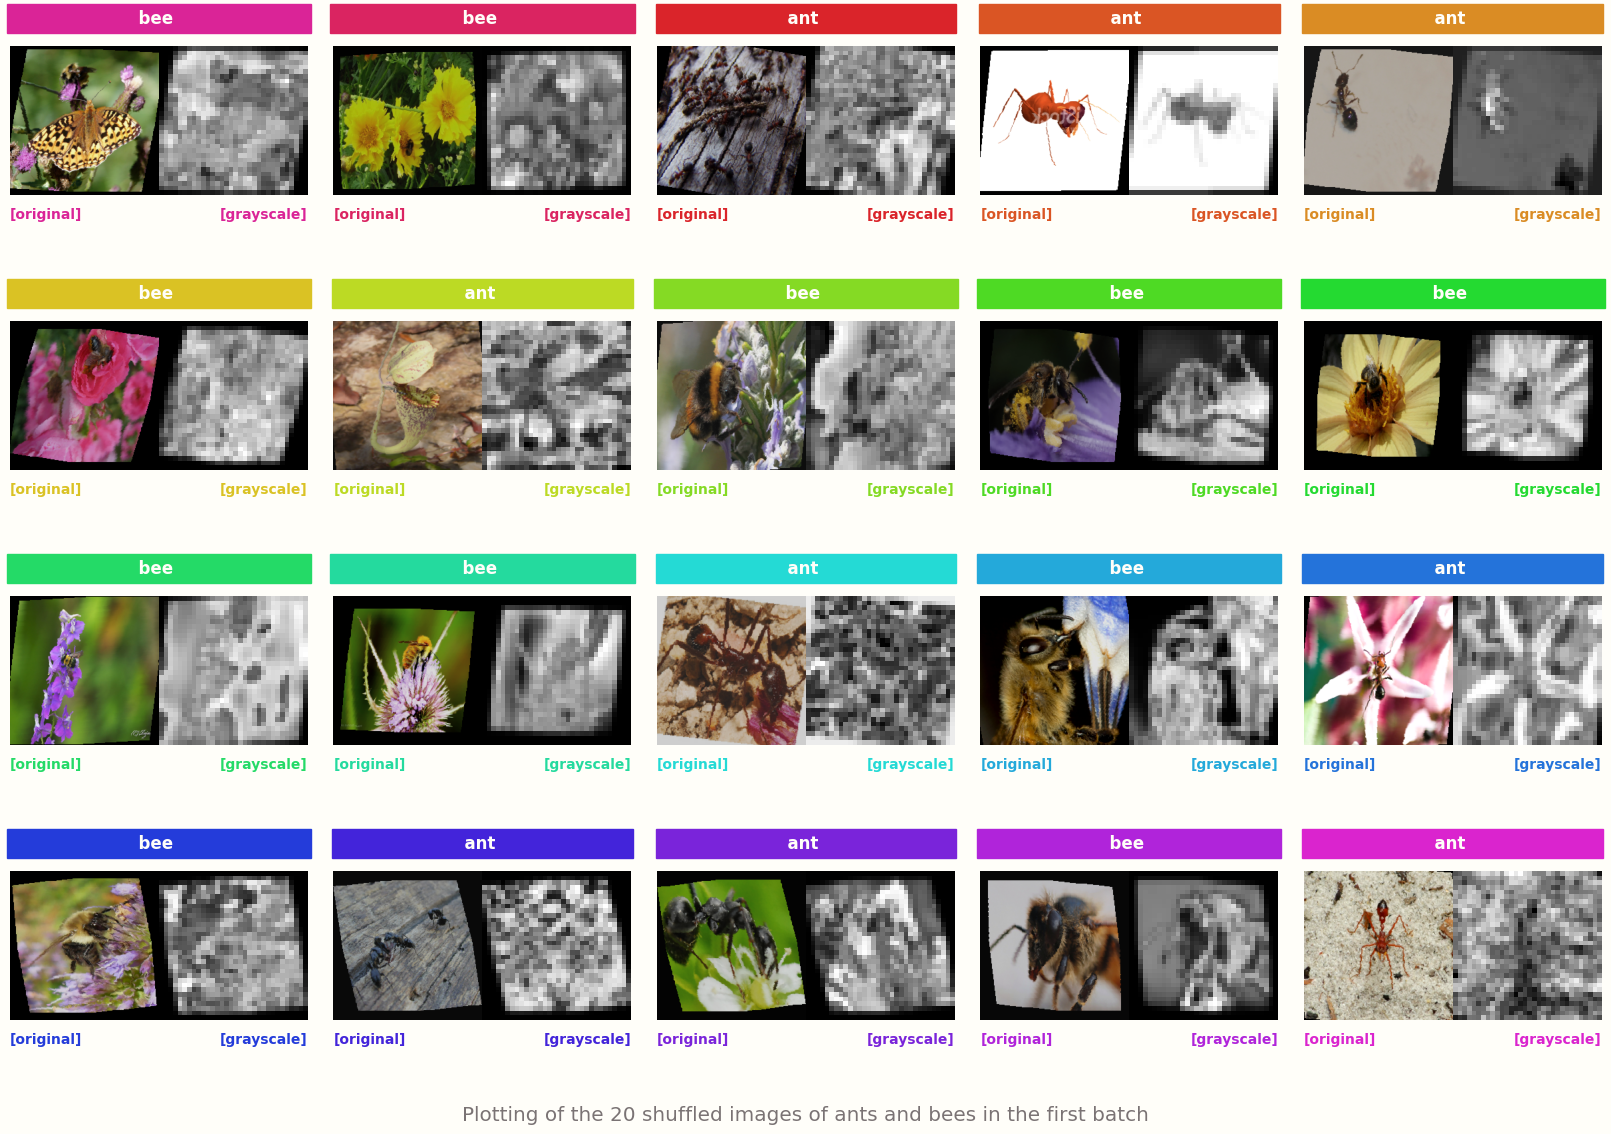

In [13]:
colors = calm_color_generator(20)

classes = ("ant", "bee")

fig = plt.figure(figsize=(figure_size[0], figure_size[1] / 9 * 11),
                 constrained_layout=True)

gs = gridspec.GridSpec(nrows=4, ncols=5, figure=fig, wspace=.08, hspace=None)

dataiter = iter(training_loader)
images, labels = next(dataiter)

for idx in np.arange(20):
    bgcolor = colors.pop(0)
    ax = fig.add_subplot(gs[idx // 5, idx % 5],
                         xticks=[],
                         yticks=[],
                         frameon=False)
    spaces = " " * 23
    title = classes[labels[idx].item()]
    if title in ["dog", "deer"]:
        title = title.center(50 - len(title))
    else:
        title = title.center(51 - len(title))
    ax.set_title(title,
                 loc="center",
                 pad=0,
                 backgroundcolor=bgcolor,
                 color=plt.rcParams["axes.facecolor"],
                 fontweight="heavy")

    axins1 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper left",
                        borderpad=0)
    axins1.set(xticks=[], yticks=[], frame_on=False)
    axins1.imshow(im_convert(images[idx]))
    axins1.set_xlabel("[original]",
                      loc="left",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

    axins2 = inset_axes(ax,
                        width="50%",
                        height="75%",
                        loc="upper right",
                        borderpad=0)
    axins2.set(xticks=[], yticks=[], frame_on=False)
    axins2.imshow(grayscale_im_convert(images[idx]), cmap="binary_r")
    axins2.set_xlabel("[grayscale]",
                      loc="right",
                      labelpad=5,
                      color=bgcolor,
                      fontweight="bold")

fig.suptitle(
    "Plotting of the 20 shuffled images of ants and bees in the first batch",
    fontsize="x-large",
    x=0.5,
    y=0)

plt.show()

In [14]:
model = models.alexnet(weights="DEFAULT")

tabulation = Form_Generator()
tabulation.heading_printer(
    "Loading the pre-trained AlexNet model from PyTorch")

statements = ["""
model = models.alexnet(weights="DEFAULT")
"""]
tabulation.statement_generator(statements)

variables = ["model"]
values = [str(model)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(model.features)", "len(model.classifier)",
    "model.classifier[6].in_features", "model.classifier[6].out_features"
]
results = [
    str(len(model.features)),
    str(len(model.classifier)),
    str(model.classifier[6].in_features),
    str(model.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

Loading the pre-trained AlexNet model from PyTorch

    +-------------------------------------------+
    | Statement                                 |
    +-------------------------------------------+
    | model = models.alexnet(weights="DEFAULT") |
    +-------------------------------------------+
    +----------+-------------------------------------------------+
    | Variable | Value                                           |
    +----------+-------------------------------------------------+
    | model    | AlexNet(                                        |
    |          |   (features): Sequential(                       |
    |          |     (0): Conv2d(3, 64, kernel_size=(11, 11),    |
    |          |         stride=(4, 4), padding=(2, 2))          |
    |          |     (1): ReLU(inplace=True)                     |
    |          |     (2): MaxPool2d(kernel_size=3, stride=2,     |
    |          |         padding=0, dilation=1, ceil_mode=False) |
    |          |     (3): Co

In [15]:
for param in model.features.parameters():
    param.requires_grad = False

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer

tabulation = Form_Generator()
tabulation.heading_printer(
    "Modification of pre-trained model to fit local datasets")

statements = [
    """
for param in model.features.parameters():
    param.requires_grad = False

n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer
"""
]
tabulation.statement_generator(statements)

variables = ["n_inputs", "last_layer", "model"]
values = [str(n_inputs), str(last_layer), str(model)]
tabulation.variable_generator(variables, values)

expressions = [
    "len(model.features)", "len(model.classifier)",
    "model.classifier[6].in_features", "model.classifier[6].out_features"
]
results = [
    str(len(model.features)),
    str(len(model.classifier)),
    str(model.classifier[6].in_features),
    str(model.classifier[6].out_features)
]
tabulation.expression_generator(expressions, results)

Modification of pre-trained model to fit local datasets

    +------------------------------------------------+
    | Statement                                      |
    +------------------------------------------------+
    | for param in model.features.parameters():      |
    |     param.requires_grad = False                |
    |                                                |
    | n_inputs = model.classifier[6].in_features     |
    | last_layer = nn.Linear(n_inputs, len(classes)) |
    | model.classifier[6] = last_layer               |
    +------------------------------------------------+
    +------------+------------------------------------------------+
    | Variable   | Value                                          |
    +------------+------------------------------------------------+
    | n_inputs   | 4096                                           |
    | last_layer | Linear(in_features=4096, out_features=2,       |
    |            |         bias=True)                